In [ ]:
import numpy as np

class ContextualBandit:
    def __init__(self, num_arms, num_features):
        self.num_arms = num_arms
        self.num_features = num_features
        # Initialize the model parameters (e.g., weights for each feature)
        self.theta = np.random.normal(0, 1, size=(num_arms, num_features))

    def select_arm(self, context):
        # Sample from the posterior distribution of rewards for each arm
        expected_rewards = np.dot(self.theta, context)
        sampled_rewards = np.random.normal(expected_rewards, 1)
        # Choose the arm with the highest sampled reward
        return np.argmax(sampled_rewards)

    def update(self, chosen_arm, reward, context):
        # Update the model parameters using Bayesian updating
        self.theta[chosen_arm] += reward * context

# Simulating online advertising scenario
num_arms = 5  # Number of ads
num_features = 3  # Number of user features
num_iterations = 1000  # Number of iterations

# Generate synthetic user contexts (features)
user_contexts = np.random.normal(0, 1, size=(num_iterations, num_features))

# Initialize the contextual bandit algorithm
bandit = ContextualBandit(num_arms, num_features)

# Simulate interactions and update the bandit algorithm
total_rewards = 0
for t in range(num_iterations):
    # Generate user context for the current iteration
    context = user_contexts[t]
    # Select an arm based on the user context
    chosen_arm = bandit.select_arm(context)
    # Simulate reward based on the chosen arm and user context
    # Ensure that the probability falls within the valid range [0, 1]
    reward_probability = np.dot(bandit.theta[chosen_arm], context)
    reward_probability = max(0, min(1, reward_probability))  # Clip probability to [0, 1]
    reward = np.random.binomial(1, p=reward_probability)
    # Update the bandit algorithm with the observed reward
    bandit.update(chosen_arm, reward, context)
    # Accumulate total rewards
    total_rewards += reward

# Calculate average reward per iteration
average_reward = total_rewards / num_iterations
print("Average reward per iteration:", average_reward)


Average reward per iteration: 0.996


Average reward per iteration: 0.999


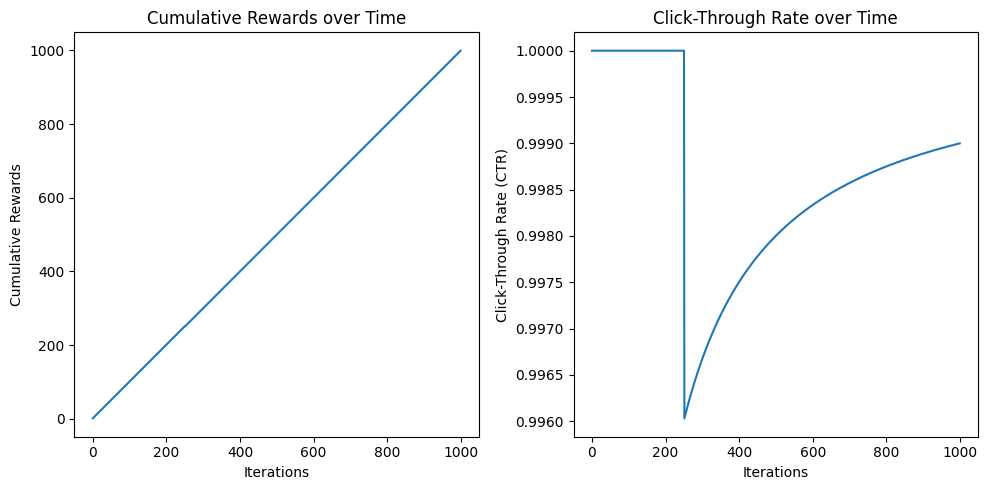

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ContextualBandit:
    def __init__(self, num_arms, num_features):
        self.num_arms = num_arms
        self.num_features = num_features
        # Initialize the model parameters (e.g., weights for each feature)
        self.theta = np.random.normal(0, 1, size=(num_arms, num_features))

    def select_arm(self, context):
        # Sample from the posterior distribution of rewards for each arm
        expected_rewards = np.dot(self.theta, context)
        sampled_rewards = np.random.normal(expected_rewards, 1)
        # Choose the arm with the highest sampled reward
        return np.argmax(sampled_rewards)

    def update(self, chosen_arm, reward, context):
        # Update the model parameters using Bayesian updating
        self.theta[chosen_arm] += reward * context

# Simulating online advertising scenario
num_arms = 5  # Number of ads
num_features = 3  # Number of user features
num_iterations = 1000  # Number of iterations

# Generate synthetic user contexts (features)
user_contexts = np.random.normal(0, 1, size=(num_iterations, num_features))

# Initialize the contextual bandit algorithm
bandit = ContextualBandit(num_arms, num_features)

# Simulate interactions and update the bandit algorithm
total_rewards = 0
cumulative_rewards = []
ctr = []
for t in range(num_iterations):
    # Generate user context for the current iteration
    context = user_contexts[t]
    # Select an arm based on the user context
    chosen_arm = bandit.select_arm(context)
    # Simulate reward based on the chosen arm and user context
    # Ensure that the probability falls within the valid range [0, 1]
    reward_probability = np.dot(bandit.theta[chosen_arm], context)
    reward_probability = max(0, min(1, reward_probability))  # Clip probability to [0, 1]
    reward = np.random.binomial(1, p=reward_probability)
    # Update the bandit algorithm with the observed reward
    bandit.update(chosen_arm, reward, context)
    # Accumulate total rewards
    total_rewards += reward
    cumulative_rewards.append(total_rewards)
    ctr.append(total_rewards / (t + 1))  # Click-through rate (CTR)

# Calculate average reward per iteration
average_reward = total_rewards / num_iterations
print("Average reward per iteration:", average_reward)

# Plot cumulative rewards and click-through rate (CTR) over time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards)
plt.xlabel("Iterations")
plt.ylabel("Cumulative Rewards")
plt.title("Cumulative Rewards over Time")

plt.subplot(1, 2, 2)
plt.plot(ctr)
plt.xlabel("Iterations")
plt.ylabel("Click-Through Rate (CTR)")
plt.title("Click-Through Rate over Time")

plt.tight_layout()
plt.show()
